<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
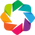

In [1]:
import json
import csv
import re
import os
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
hv.extension('bokeh', 'matplotlib')
import hvplot.pandas
import panel as pn
import param
pn.extension()

from math import pi
from bokeh.palettes import Category20c, Category20
from bokeh.plotting import figure
from bokeh.transform import cumsum

from geopy.geocoders import Nominatim

Available files are in json, I will extract data and convert them to csv for easy handle

In [2]:
def extract_lines_with_features(file_path): #will perform analysis on Indian and Austrlian male cricket playerd
    extracted_lines = []
    extracted_values = []

    if not os.path.isfile(file_path):
        raise ValueError(f"The path {file_path} is not a file or doesn't exist.")

    with open(file_path, 'r') as file:
        for line in file:
            if 'international' in line and 'Test' in line and not 'female' in line: #and ('India' in line or 'Australia' in line):
                extracted_lines.append(line.strip())
                match = re.search(r'\d{4}-\d{2}-\d{2} - international - Test - male - (\d+) -', line)
                if match:
                    extracted_values.append(match.group(1))
    return extracted_lines, extracted_values


file_path = 'Readme.txt'
if os.path.exists(file_path) and os.access(file_path, os.R_OK):
    lines, values = extract_lines_with_features(file_path)


In [3]:
def json_to_csv(files):
    
    def make_dict(name):#return dict with ball by ball data
        file_name = name+'.json'
        file_path = 'data\\tests_json'
        file_path = os.path.join(file_path,file_name)
    
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
        
        ball_by_ball_data = []
        inngs = -1
        for inning in data.get('innings', []):
            inngs += 1
            team = inning.get('team', 'Unknown')
            for over in inning.get('overs', []):
                over_number = over.get('over', -1)
                for delivery in over.get('deliveries', []):
                    ball = {
                        'innings' : inngs,
                        'team': team,
                        'over': over_number,
                        'batter': delivery.get('batter', 'Unknown'),
                        'bowler': delivery.get('bowler', 'Unknown'),
                        'non_striker': delivery.get('non_striker', 'Unknown'),
                        'batter_runs': delivery.get('runs', {}).get('batter', 0),
                        'extras_runs': delivery.get('runs', {}).get('extras', 0),
                        'total_runs': delivery.get('runs', {}).get('total', 0),
                        'wicket_player_out': None,
                        'wicket_kind': None,
                        'wicket_fielders': None,
                        'match_id' : name  #file name as match id will use an unique id in bpth tables for merging
                    }
        
                    if 'wickets' in delivery:
                        wicket = delivery['wickets'][0]  
                        ball['wicket_player_out'] = wicket.get('player_out', None)
                        ball['wicket_kind'] = wicket.get('kind', None)
                        ball['wicket_fielders'] = ', '.join(
                            fielder.get('name', '') for fielder in wicket.get('fielders', [])
                        )
        
                    ball_by_ball_data.append(ball)
        return ball_by_ball_data
    def match_info(name): #similarly I will extract match info from json
        file_name = name+'.json'
        file_path = 'data\\tests_json'
        file_path = os.path.join(file_path,file_name)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
        match_info = {
            'balls_per_over': data.get('info', {}).get('balls_per_over', 0),
            'city': data.get('info', {}).get('city', 'Unknown'),
            'dates': ', '.join(data.get('info', {}).get('dates', [])),
            'event_name': data.get('info', {}).get('event', {}).get('name', 'Unknown'),
            'match_number': data.get('info', {}).get('event', {}).get('match_number', 'Unknown'),
            'gender': data.get('info', {}).get('gender', 'male'),
            'match_type': data.get('info', {}).get('match_type', 'Test'),
            'venue': data.get('info', {}).get('venue', 'Unknown'),
            'season': data.get('info', {}).get('season', 'Unknown'),
            'team_type': data.get('info', {}).get('team_type', 'international'),
            'toss_decision': data.get('info', {}).get('toss', {}).get('decision', 'Unknown'),
            'toss_winner': data.get('info', {}).get('toss', {}).get('winner', 'Unknown'),
            'outcome_result': data.get('info', {}).get('outcome', {}).get('result', 'Unknown'),
            'player_of_match': ', '.join(data.get('info', {}).get('player_of_match', [])),
            'team_1': data.get('info', {}).get('teams')[0],
            'team_2': data.get('info', {}).get('teams')[1],
            'players_team1': ', '.join(data.get('info', {}).get('players', {}).get((data.get('info', {}).get('teams'))[0], [])),
            'players_team2': ', '.join(data.get('info', {}).get('players', {}).get((data.get('info', {}).get('teams'))[1], [])),
            'match_referees': ', '.join(data.get('info', {}).get('officials', {}).get('match_referees', [])),
            'tv_umpires': ', '.join(data.get('info', {}).get('officials', {}).get('tv_umpires', [])),
            'umpires': ', '.join(data.get('info', {}).get('officials', {}).get('umpires', [])),
            'match_id' : name } #match id as unique id
        return match_info

    output_csv_ball_path = 'data\\ball_by_ball.csv' #save in data
    output_csv_match_path = 'data\\matches.csv'
    
    with open(output_csv_ball_path, 'a', newline='', encoding='utf-8') as csv_file:
        fieldnames_ball = [
            'innings', 'team', 'over', 'batter', 'bowler', 'non_striker','batter_runs', 'extras_runs', 'total_runs',
            'wicket_player_out', 'wicket_kind', 'wicket_fielders','match_id']
        
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames_ball)
        csv_writer.writeheader()
        for file in files:
            ball_by_ball_data = make_dict(file)
            csv_writer.writerows(ball_by_ball_data)


    with open(output_csv_match_path, 'a', newline='', encoding='utf-8') as csv_file:
        fieldnames_match = ['balls_per_over','city','dates','event_name','match_number','gender','match_type','venue','season',
                           'team_type','toss_decision','toss_winner','outcome_result','player_of_match','team_1','team_2',
                           'players_team1','players_team2','match_referees','tv_umpires','umpires','match_id']
        
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames_match)
        csv_writer.writeheader()
        for file in files:
            csv_writer.writerow(match_info(file))

    print("files have been converted to csv")

json_to_csv(values)

files have been converted to csv


Now, I will perform EDA on both Datasets

In [6]:
ball = pd.read_csv('data\\ball_by_ball.csv')
print("Exploratory Data Analysis: ")
print("First few Entries of ball deliveries")
print(ball.head(7))
print("Dataset info")
print("Dataset shape : ",ball.shape)
print(ball.info())
print(ball.describe())
print()
print("total number of matches",len(ball['match_id'].unique()))
print()
print("total number of deliveries : ",len(ball))
print()

Exploratory Data Analysis: 
First few Entries of ball deliveries
   innings         team  over      batter          bowler non_striker  \
0        0  New Zealand     0  TWM Latham  Mohammed Siraj   DP Conway   
1        0  New Zealand     0   DP Conway  Mohammed Siraj  TWM Latham   
2        0  New Zealand     0   DP Conway  Mohammed Siraj  TWM Latham   
3        0  New Zealand     0   DP Conway  Mohammed Siraj  TWM Latham   
4        0  New Zealand     0   DP Conway  Mohammed Siraj  TWM Latham   
5        0  New Zealand     0   DP Conway  Mohammed Siraj  TWM Latham   
6        0  New Zealand     1  TWM Latham      Akash Deep   DP Conway   

   batter_runs  extras_runs  total_runs wicket_player_out wicket_kind  \
0            1            0           1               NaN         NaN   
1            0            0           0               NaN         NaN   
2            0            0           0               NaN         NaN   
3            0            0           0               NaN 

In [6]:
#check for missing values
print("missing values in ball by ball delivery")
plt.figure(figsize=(8, 6))
sns.heatmap(ball.isnull(), cbar=False, cmap='viridis', yticklabels=False)

missing values in ball by ball delivery


<Axes: >

In [7]:
#lets change data type of columns
print("changing data types of ball by ball delivery")
# print(ball['over'].unique())
# print(ball[ball['over'] == 'over'])
column_types = {
    'over': 'int',            
    'batter_runs': 'int',          
    'extras_runs': 'int',
    'total_runs': 'int',
}
ball = ball.astype(column_types)
#adding new features
ball['score'] = ball['total_runs'].cumsum()
ball['partnership'] = ball.apply(lambda row: set([row['batter'], row['non_striker']]), axis=1)
print('deliveries info')
print(ball.info(),ball.head())

changing data types of ball by ball delivery
deliveries info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594840 entries, 0 to 1594839
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   team               1594840 non-null  object
 1   over               1594840 non-null  int64 
 2   batter             1594840 non-null  object
 3   bowler             1594840 non-null  object
 4   non_striker        1594840 non-null  object
 5   batter_runs        1594840 non-null  int64 
 6   extras_runs        1594840 non-null  int64 
 7   total_runs         1594840 non-null  int64 
 8   wicket_player_out  26255 non-null    object
 9   wicket_kind        26255 non-null    object
 10  wicket_fielders    16507 non-null    object
 11  match_id           1594840 non-null  int64 
 12  score              1594840 non-null  int64 
 13  partnership        1594840 non-null  object
dtypes: int64(6), object(8)
memory usage: 

In [8]:
#lets validate our data
#lets check range runs must be 0 to 8
run_cols = ['batter_runs','extras_runs','total_runs']
for cols in run_cols:
    print(ball[cols].unique())
    

[1 0 4 3 2 6 5 7 8]
[0 1 2 4 5 3 6]
[1 0 4 3 2 6 5 7 8]


In [69]:
match = pd.read_csv('data\\matches.csv')
print("Exploratory Data Analysis: ")
print("First few Entries of matches")
print(match.head())
print("Dataset info")
print("Dataset shape : ",ball.shape)
print(match.info())
print(match.describe())
print()

Exploratory Data Analysis: 
First few Entries of matches
   balls_per_over       city  \
0               6     Mumbai   
1               6       Pune   
2               6  Bengaluru   
3               6     Kanpur   
4               6    Chennai   

                                               dates  \
0                 2024-11-01, 2024-11-02, 2024-11-03   
1                 2024-10-24, 2024-10-25, 2024-10-26   
2  2024-10-16, 2024-10-17, 2024-10-18, 2024-10-19...   
3  2024-09-27, 2024-09-28, 2024-09-29, 2024-09-30...   
4     2024-09-19, 2024-09-20, 2024-09-21, 2024-09-22   

                  event_name match_number gender match_type  \
0  New Zealand tour of India            3   male       Test   
1  New Zealand tour of India            2   male       Test   
2  New Zealand tour of India            1   male       Test   
3   Bangladesh tour of India            2   male       Test   
4   Bangladesh tour of India            1   male       Test   

                                  

In [9]:
match['start_date'] = match['dates'].apply(lambda x: x[:10])
match['start_date'] = pd.to_datetime(match['start_date'])
match['teams'] = match['teams'].apply(lambda x: set(x.split(', ')))
print(match['start_date'].min())
print(match['start_date'].max())

2001-12-19 00:00:00
2024-11-01 00:00:00


In [10]:
print(match.info(),match.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   balls_per_over   368 non-null    int64         
 1   city             368 non-null    object        
 2   dates            368 non-null    object        
 3   event_name       368 non-null    object        
 4   match_number     368 non-null    object        
 5   gender           368 non-null    object        
 6   match_type       368 non-null    object        
 7   venue            368 non-null    object        
 8   season           368 non-null    object        
 9   team_type        368 non-null    object        
 10  toss_decision    368 non-null    object        
 11  toss_winner      368 non-null    object        
 12  outcome_result   368 non-null    object        
 13  player_of_match  366 non-null    object        
 14  teams            368 non-null    object   

In [76]:
class Dashboard(param.Parameterized):

    def __init__(self, **params):
        self.ball_data = self.get_ball_data
        self.match_data = self.get_match_data

        self.date_picker = pn.widgets.DatePicker(name='Date Picker', value=dt.datetime(2024, 11, 1))

        
        super().__init__(**params)

        self.layout1 = ('Introduction',pn.Column(self.create_intro_tab_text,pn.Row(self.make_piechart_by_balls,self.make_piechart_by_runs(self.ball_data))))
        self.layout3 = ('Team India',pn.Column(pn.Row(self.date_picker,self.get_dates('India')),self.team_india))
        self.layout4 = ('player analysis',pn.Row())


        self.layout = pn.Tabs(self.layout1,self.layout3,self.layout4)

    @property
    def get_ball_data(self):
        ball = pd.read_csv('data\\ball_by_ball.csv')
        column_types = {
            'over': 'int',            
            'batter_runs': 'int',          
            'extras_runs': 'int',
            'total_runs': 'int'}
        ball = ball.astype(column_types)
        ball.sort_values(by='over', inplace=True)
        ball['score'] = ball['total_runs'].cumsum()
        ball['partnership'] = ball.apply(lambda row: set([row['batter'], row['non_striker']]), axis=1)
        return ball

    @property
    def get_match_data(self):
        match = pd.read_csv('data\\matches.csv')
        match['start_date'] = match['dates'].apply(lambda x: x[:10])
        match['teams'] = match['teams'].apply(lambda x: set(x.split(', ')))
        match['start_date'] = pd.to_datetime(match['start_date'])
        match['start_date'] = match['start_date'].dt.date
        return match


    def get_dates(self,t):
        df = self.match_data
        data = df[df['teams'].apply(lambda x: t in x)]
        data = data[['start_date','teams']]
        df_widget = pn.widgets.DataFrame(data, name='dates')
        return df_widget
        
    @param.depends("date_picker.value")
    def team_india(self):
        df = self.match_data
        data = df[df['teams'].apply(lambda x: 'India' in x)]
        data = data[data['start_date'] == self.date_picker.value]
        match_id = data['match_id'].iloc[0]
        match_details = self.ball_data[match_id==self.ball_data['match_id']]
        
        teams = data['teams'].iloc[0]
        teams = list(teams)
        players_1 = (data['players_team1'].iloc[0]).split(", ")
        players_2 = (data['players_team2'].iloc[0]).split(", ")

        scores = match_details.groupby('batter')['batter_runs'].sum().reset_index()
        scores = scores.reset_index(drop=True)
        scores = scores.sort_values(by='batter_runs',ascending=False)
        top_batsman = pn.widgets.DataFrame(scores.head(), name='top batsman')
        
        return pn.Column(self.get_scorecard(match_details,teams[0]),self.get_scorecard(match_details,teams[1]),
                         self.make_piechart_by_runs(match_details),top_batsman)#top_partnership
        

    def get_scorecard(self,match_details,team):
        df = match_details[match_details['team']==team]
        
        line =df.hvplot.line(x='over', y='score', title='ScoreCard '+team, xlabel='overs', ylabel='Runs',hover=True,line_width=4,color='green',)
        scatter_plot = df[df['wicket_kind'].notna()].hvplot.scatter(x='over', y='score', color='red', label='Wickets Taken')
        
        return line*scatter_plot

    
    @property
    def make_piechart_by_balls(self):
        freq_by_ball = self.ball_data['total_runs'].value_counts().to_dict()
        freq_by_run = {key : key*value for key, value in freq_by_ball.items()}

        data = pd.Series(freq_by_ball).reset_index(name='value').rename(columns={'index':'runs'})
        data['angle'] = data['value']/data['value'].sum() * 2*pi
        data['color'] = Category20c[len(freq_by_ball)]
        
        p = figure(height=350, title="Distribution of runs by deliveries", toolbar_location=None,
                   tools="hover", tooltips="@runs: @value", x_range=(-0.5, 1.0))
        
        r = p.wedge(x=0, y=1, radius=0.4,
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
                line_color="white", fill_color='color', legend_field='runs', source=data)
        
        p.axis.axis_label=None
        p.axis.visible=False
        p.grid.grid_line_color = None
        
        bokeh_pane = pn.pane.Bokeh(p, theme="dark_minimal")
        return bokeh_pane

    
    def make_piechart_by_runs(self,df):
        freq_by_ball = df['total_runs'].value_counts().to_dict()
        freq_by_run = {key : key*value for key, value in freq_by_ball.items()}

        data = pd.Series(freq_by_run).reset_index(name='value').rename(columns={'index':'runs'})
        data['angle'] = data['value']/data['value'].sum() * 2*pi
        data['color'] = Category20c[len(freq_by_run)]
        
        p = figure(height=350, title="Contribution of runs", toolbar_location=None,
                   tools="hover", tooltips="@runs: @value", x_range=(-0.5, 1.0))
        
        r = p.wedge(x=0, y=1, radius=0.4,
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
                line_color="white", fill_color='color', legend_field='runs', source=data)
        
        p.axis.axis_label=None
        p.axis.visible=False
        p.grid.grid_line_color = None
        
        bokeh_pane = pn.pane.Bokeh(p, theme="dark_minimal")
        return bokeh_pane

    
    @property
    def create_intro_tab_text(self):
        text = ("Let's look at some base stats \n we are looking at "+str(len(self.match_data['match_id'])) +
        " test matches played by India and Australia against other teams as well\n\nwe have the following Teams \n\n ")
        title = "# Introduction"
        teams = set().union(*self.match_data['teams'])
        
        def fun(row):
            return self.match_data['teams'].apply(lambda x: row['teams'] in x).sum()
        
        df = pd.DataFrame({'teams':list(teams)})
        df['matches_played'] = df.apply(fun, axis=1)
        df_widget = pn.widgets.DataFrame(df, name='Teams')
        text2 = "Dataset Analysis ...\n "
        text3 = "We have zero missing values except for wickets \n shape of match dataset : " + str(self.match_data.shape)+" shape of ball dataset : " + str(self.ball_data.shape)
        text4 = "Two data sets, ball_by_ball data and matches_data \n I use match id as foreign and unique key repectively"
        text5 = "new features added succesfully : partnership, cumulative score, match start date"
        
        return pn.Column(
            pn.Row(title), pn.layout.Divider(), text,df_widget,text2,pn.layout.Divider(),text3,text4,text5
        )

d = Dashboard()
d.layout

Tabs
    [0] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
            [1] Divider()
            [2] Markdown(str)
            [3] DataFrame(name='Teams', value=           teams  ...)
            [4] Markdown(str)
            [5] Divider()
            [6] Markdown(str)
            [7] Markdown(str)
            [8] Markdown(str)
        [1] Row
            [0] Bokeh(figure, theme='dark_minimal')
            [1] Bokeh(figure, theme='dark_minimal')
    [1] Column
        [0] Row
            [0] DatePicker(name='Date Picker', value=datetime.date(2024, ...)
            [1] DataFrame(name='dates', value=     start_date           ...)
        [1] ParamMethod(method, _pane=Column, defer_load=False)
    [2] Row()

In [53]:
def get_long_lat(address):
    geolocator = Nominatim(user_agent="myapplication")
    location = geolocator.geocode(address)
    return location.longitude,location.latitude

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
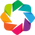

30


In [72]:
import geopandas
import geoviews as gv
gv.extension('bokeh')
match = match[match['teams'].apply(lambda x: 'India' in x)]
# match = match.head(30)
print(len(match))
match['Longitude'], match['Latitude'] = zip(*match['city'].apply(get_long_lat))
gdf = geopandas.GeoDataFrame(
    match, geometry=geopandas.points_from_xy(match.Longitude, match.Latitude), crs="EPSG:4326"
)

In [75]:
p = gv.Points(gdf['geometry']).opts(color='red',title= 'venues', width = 800,height = 800)
p *= gv.tile_sources.OSM()
p

:Overlay
   .Points.I :Points   [Longitude,Latitude]
   .WMTS.I   :WMTS   [Longitude,Latitude]